# Phase II Data Science project: Analysis real estate value  based on different parameters.




**Author:**  Andrei Mikhailov  
**email:** am@mikhailovandrei.com  
**Program:** Data Science Flex  
**Instructor name:** Abhineet Kulkarni
***

## Overview

During this project, we will be investigating the real estate datasets using multiple linear regression analysis. 
The customer is a real estate agency who want to give better price recommendations to their customers. For the sake of research, we will use the following dataset (with formats): 

 - King County, WA Real Estate, CSV

 
We will employ Pandas, Statsmodel, NumPy, MatPlotLib, and SeaBorn libraries. 
 
Considering the task and dataset natures where we need to predict price against explicitly and relatively limited number of parameters we decided to use **linear regression analysis due to its simplicity, transparency and versatility which makes it appropriate for our task.** 


***

## Business Problem

The customer, real estate agency, wants to have a tool for home price prediction based on different parameters, like Living Area, Number of Bedrooms or house conditions. 

### The goals are:
- Reveal factors that influence home prices the most;
- Provide advice to homeowners on how home renovation affects the price.


***

## Data exploration and preparation

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.graphics.api as smg
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

%matplotlib inline

# Importing the data
data = pd.read_csv('data/kc_house_data.csv')


/Users/andreim/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/andreim/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
data.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

As we can see, there are 3842 NaN values in the column 'yr_renovated,' and because it represents the year of renovation we  can only drop or replace these values, as applying other methods may be inappropriate. Here we will replace NanN with zero value.

In [6]:
data.yr_renovated.fillna(0, inplace=True)

In [7]:
# Next check sqft_basement column
data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

Because this column represents a continues variable, and we have only 454 '?' values, we can just drop them. 

In [8]:
# Drop rows with "?" value 
data = data[data.sqft_basement != '?']
#Convert to float
data['sqft_basement'] = data.sqft_basement.astype('float')

In [9]:
data.sqft_basement.unique()

array([   0.,  400.,  910., 1530.,  730., 1700.,  300.,  970.,  760.,
        720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,  588.,
       1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,  500.,
       1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,  710.,
        840.,  380.,  770.,  480.,  570., 1490.,  620., 1250., 1270.,
        120.,  650.,  180., 1130.,  450., 1640., 1460., 1020., 1030.,
        750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,  430.,
        850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,  580.,
       2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530., 1450.,
       1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,  660.,
       1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,  350.,
        935., 1370.,  980., 1470.,  160.,  950.,   50.,  740., 1780.,
       1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,  890.,
       1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800., 1120.,
       1810.,   60.,

We have only 63 NaN values in the 'view' column, and we simply drop them.

In [10]:
# Drop NaN in the 'view' column.
data.dropna(axis=0, subset=['view'], inplace=True)

In [11]:
# Checking the 'waterfront variable'
data.waterfront.unique()
# Fill NaN values with 'Unknown'
data.waterfront.fillna('Unknown', inplace=True)


In [12]:
# Checking NaN values in the dataset
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now we have the dataset cleaned and next we will prepare it for modelling

## Dealing with categorical variables

First we need to drop all columns which contain meaningless variables for the sake of our modeling.

In [14]:
# Drop columns
col_to_drop = ['id','date','zipcode','lat','long']
# Creating a DataFrame for modeling.
data_for_model = data.drop(col_to_drop, axis=1)
data_for_model.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,Unknown,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503


In [15]:
# Creating the basic dataset with dependent and independent variables.
X_train_base = data_for_model.drop('price', axis=1)
y_train_base = data_for_model['price']

In [16]:
# Hot one encoding data in the categorical variables.
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='wat_f', drop_first=True)
view_dummies = pd.get_dummies(data['view'], prefix='view', drop_first=True)
condition_dummies = pd.get_dummies(data['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)

X_train_base = pd.concat([X_train_base, waterfront_dummies, view_dummies, condition_dummies, grade_dummies], axis=1)

In [17]:
# Drop columns with categorical variables.
drop_cat_col = ['waterfront', 'view', 'condition', 'grade']
X_train_base.drop(drop_cat_col, axis=1, inplace=True)

## Investigating linearity and correlations

<ipython-input-18-e730960b58e7>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8, 5))


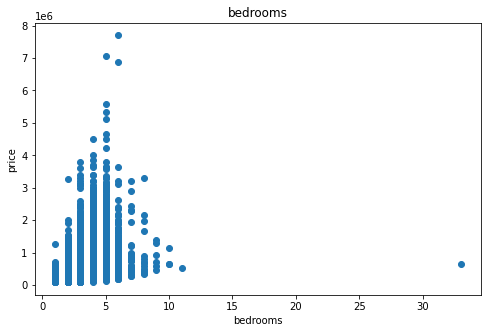

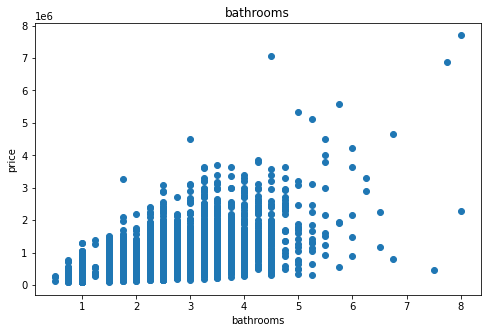

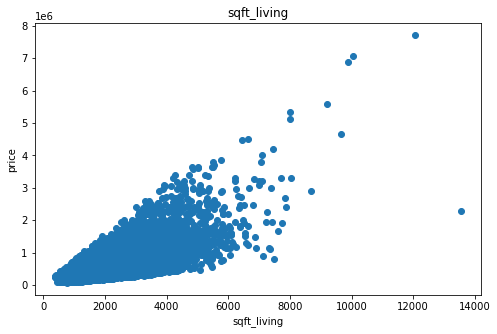

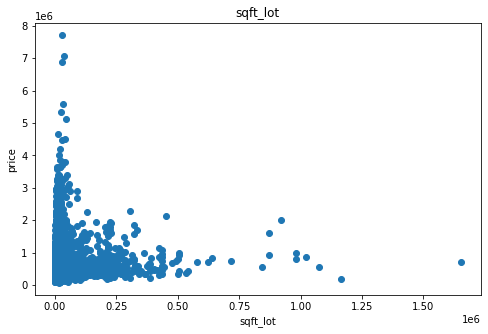

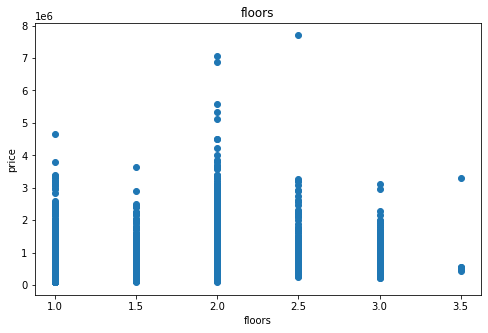

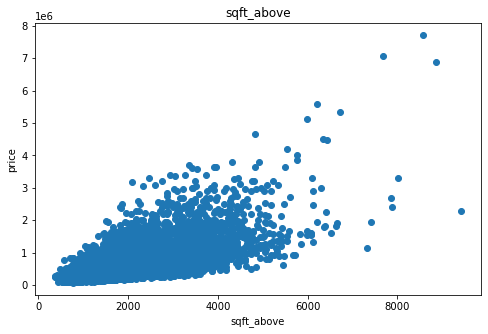

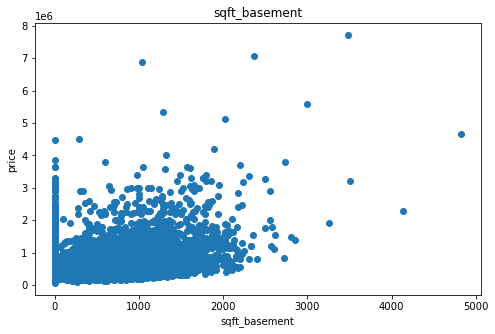

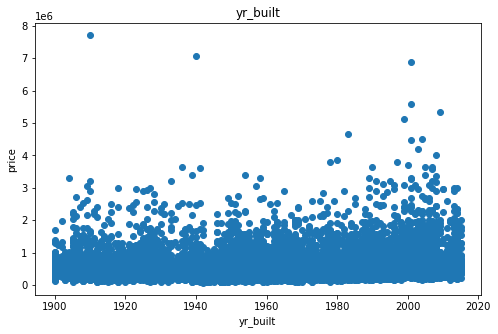

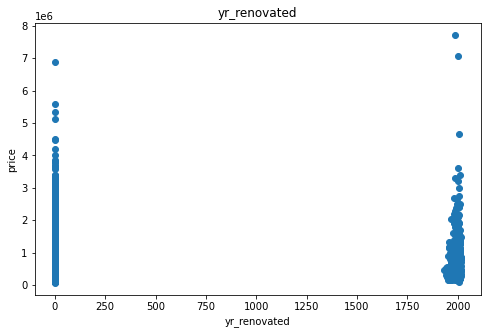

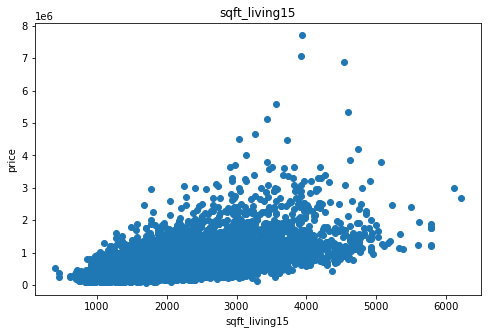

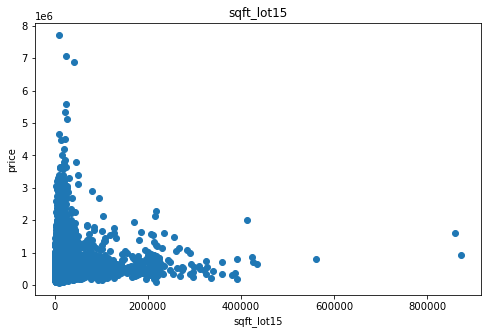

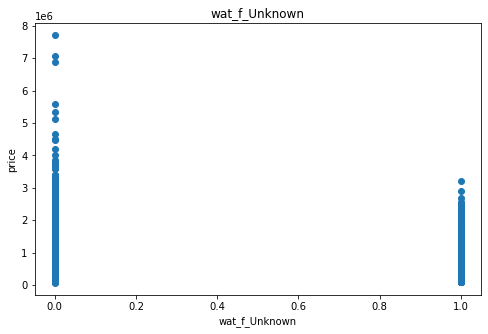

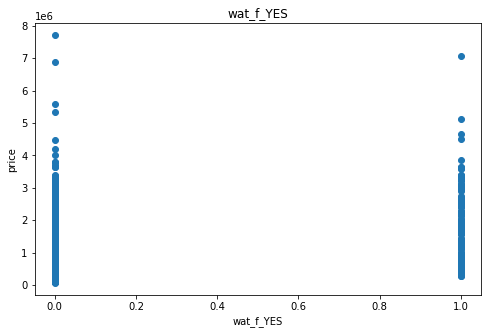

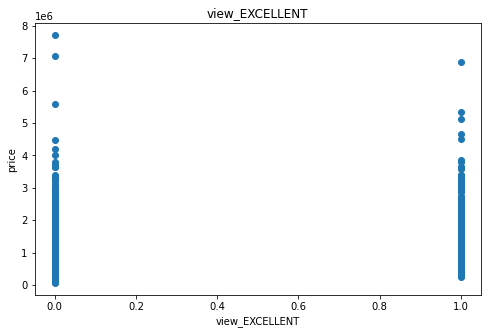

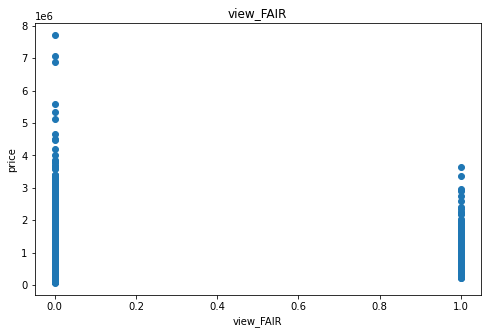

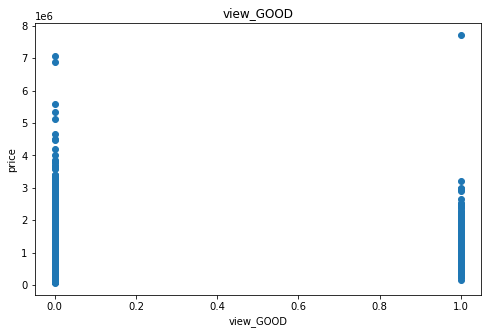

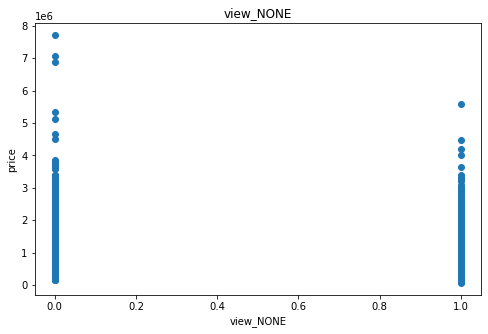

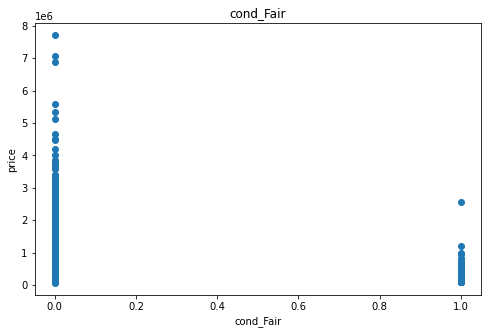

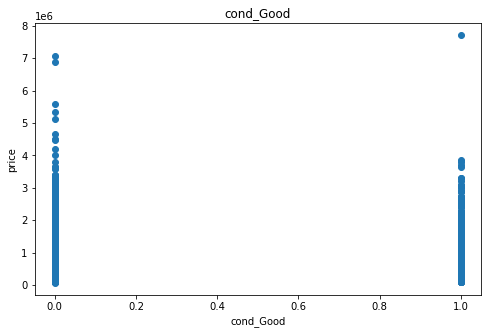

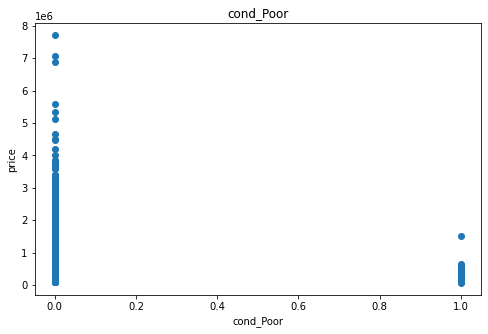

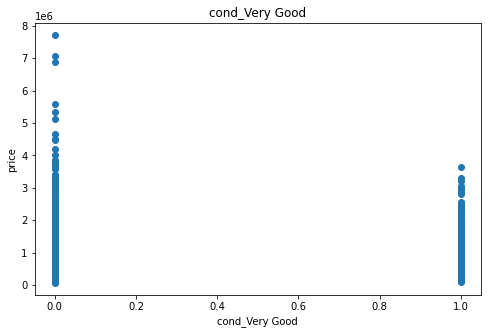

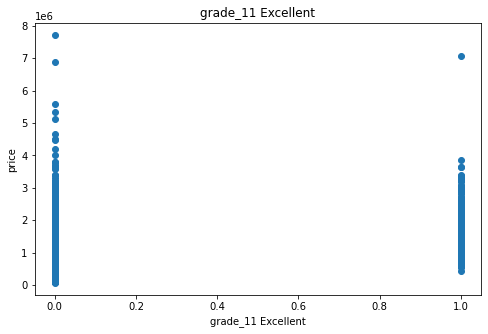

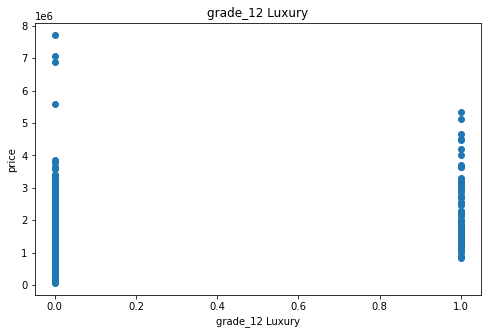

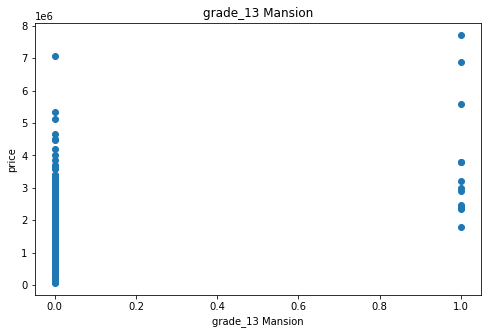

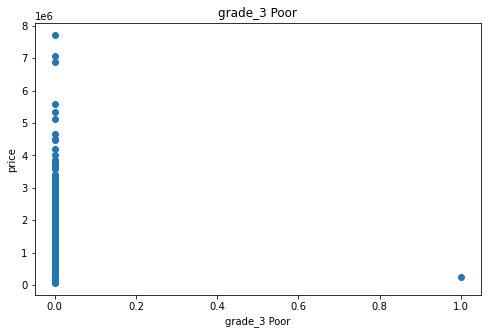

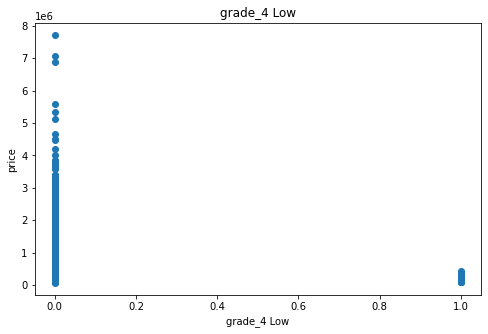

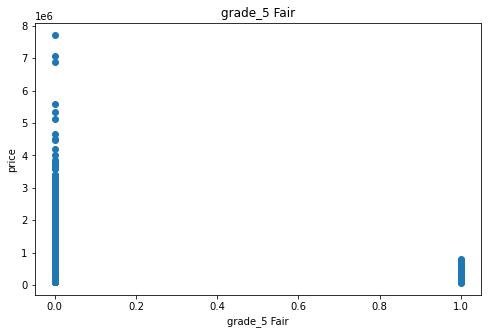

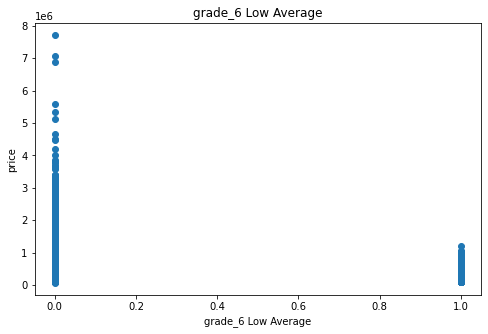

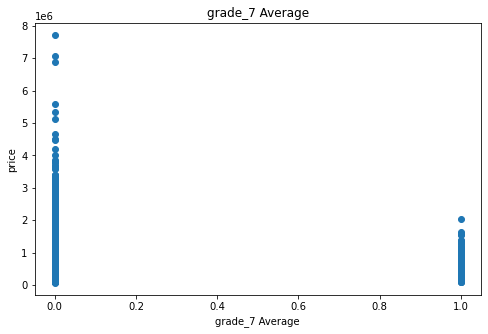

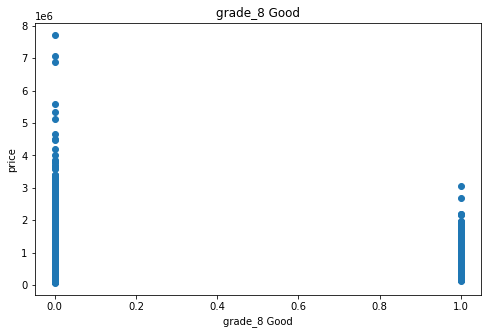

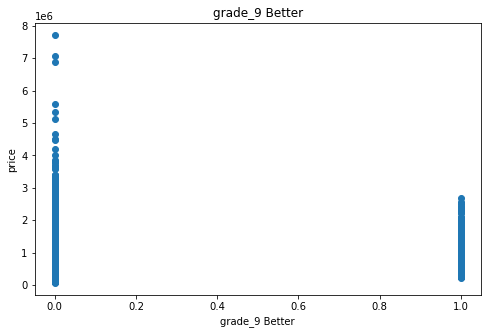

In [18]:
# First we plot all independent variables in the basic dataset against price to investigate linearity. 
for col in X_train_base:
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(X_train_base[col], y_train_base);
    
    plt.title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

It looks like sqft_living shows strongest linearity. We will check it using seaborn heatmap and correlation matrix. 

In [19]:
# Merged databases for creating a correlation matrix
data_for_model_num = pd.concat([y_train_base, X_train_base], axis=1)
# Creating a matrix
corr_matr = data_for_model_num.corr()
# Then we will select the most relevant features giving the assumption that correlation coefficient is 
# not less than or equal 0.3 the 
most_rel_features = corr_matr[corr_matr['price'] >=0.3].drop('price', axis=0)
most_rel_features.sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
sqft_living,0.702004,0.577696,0.754793,1.000000,0.173266,0.354260,0.876787,0.433369,0.319584,0.049777,...,0.344909,0.238206,0.146217,-0.011709,-0.054607,-0.126994,-0.312025,-0.359828,0.072314,0.318511
sqft_above,0.605481,0.478967,0.685959,0.876787,0.183653,0.523594,1.000000,-0.053403,0.425170,0.019099,...,0.341766,0.223105,0.128098,-0.010551,-0.048231,-0.108478,-0.280269,-0.387918,0.060199,0.342925
sqft_living15,0.586495,0.391936,0.569396,0.756199,0.143815,0.279379,0.730794,0.200709,0.325657,0.000910,...,0.308829,0.185574,0.073139,-0.006499,-0.026132,-0.093814,-0.280894,-0.378912,0.075138,0.338594
bathrooms,0.525029,0.513694,1.000000,0.754793,0.088451,0.503796,0.685959,0.281813,0.508866,0.047738,...,0.245449,0.159044,0.096376,-0.012248,-0.056341,-0.139688,-0.366272,-0.314312,0.191163,0.265148
grade_11 Excellent,0.356823,0.115891,0.245449,0.344909,0.071959,0.118923,0.341766,0.075720,0.099106,-0.002557,...,1.000000,-0.008877,-0.003406,-0.000944,-0.004910,-0.014557,-0.044278,-0.115627,-0.085693,-0.050814
sqft_basement,0.323018,0.301987,0.281813,0.433369,0.015612,-0.245628,-0.053403,1.000000,-0.133178,0.067570,...,0.075720,0.076529,0.063558,-0.004540,-0.023005,-0.060410,-0.122685,-0.020207,0.037346,0.018729
bedrooms,0.308454,1.000000,0.513694,0.577696,0.032531,0.178518,0.478967,0.301987,0.156820,0.018345,...,0.115891,0.061427,0.039577,-0.017665,-0.068905,-0.113082,-0.238213,-0.107280,0.075834,0.160343
view_EXCELLENT,0.307035,0.036234,0.108054,0.169713,0.019024,0.025156,0.107270,0.151385,-0.020479,0.065467,...,0.082625,0.120232,0.044508,-0.000843,-0.004382,0.001999,-0.023371,-0.079242,-0.013447,0.039171


Then we plot heatmap matrix for better visual inspection of correlations

<ipython-input-20-5611bc5c717b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = heatmap_data.corr()


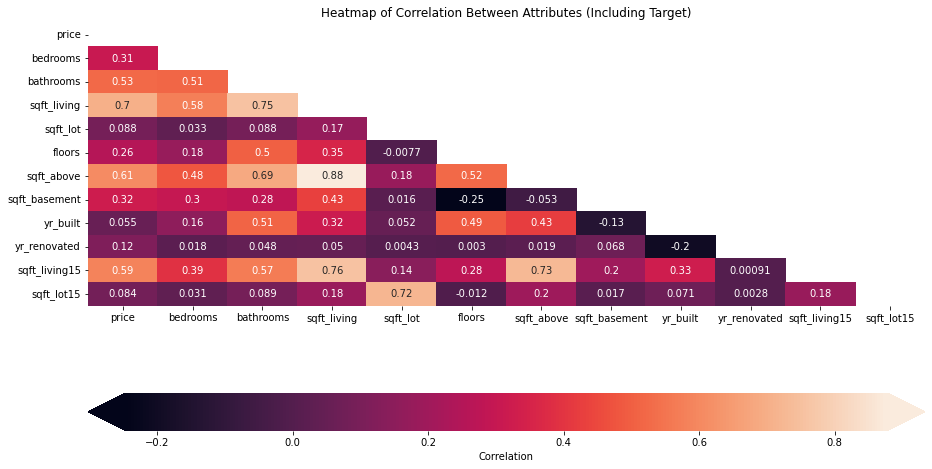

In [20]:
heatmap_data = data_for_model
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

#### Conclusions

After investigating linearity and correlation we found that 'bathrooms', 'grade_11 Excellent', 'bedrooms', 'view_EXCELLENT', 'sqft_above', 'sqft_basement', and 'grade_11 EXCELLENT' have strongest correlations with price. 
But we also notice strong correlation between 'sqft_above' and 'sqft_living', which are probably represents very simmilar things therefore we will drop the latter to reduce multicollinearity.

## Values' distribution investigation. 

We will also check distribution of all values we plan to use for modeling.

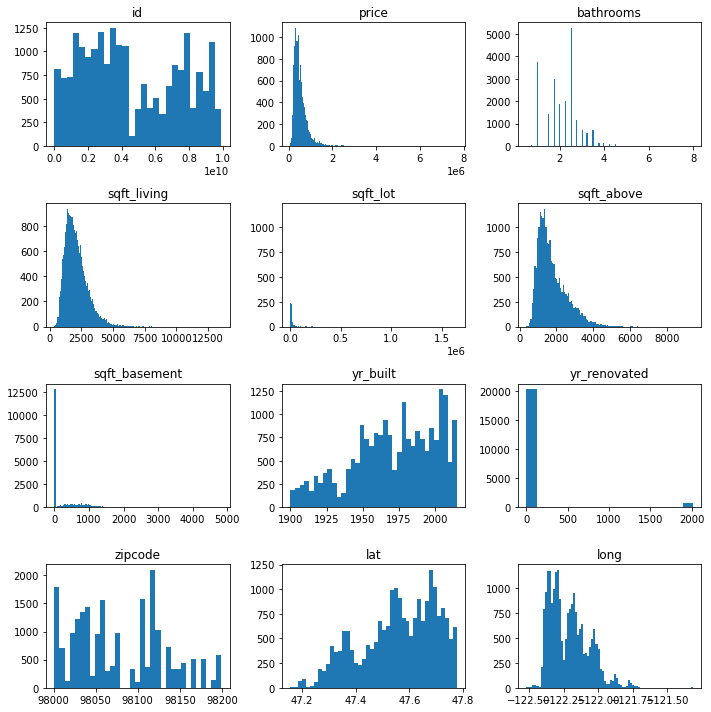

In [21]:
# Checking distribution of the independent variables
cat_data = data.loc[:, ((data.dtypes != 'object') & (data.nunique() > 20))]

fig, axes = plt.subplots(nrows=(cat_data.shape[1] // 3), ncols=3, figsize=(10,10))

categoricals = [column for column in cat_data.columns if column != 'Id']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(data[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

#### Conclusions

All variables have non-normal distributions.

## Modeling

### Building a basic model

First we build an OLS model for the most correlated feature. We will use it as a baseline. 

In [22]:
# Build a model
most_corr_data = data_for_model_num['sqft_living']
model_ols_base = sm.OLS(y_train_base, sm.add_constant(X_train_base['sqft_living'])).fit()
model_ols_base.summary()

/Users/andreim/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.048e+04
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:24:44   Log-Likelihood:            -2.9287e+05
No. Observations:               21082   AIC:                         5.857e+05
Df Residuals:                   21080   BIC:                         5.858e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.327e+04   4456.393     -9.709      0.000    -5.2e+04   -3.45e+04
sqft_living   280.4877      1.960    143.116      0.000     276.646     284.329
==============================================================================
Omnibus:                    14303.984   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           509767.330
Skew:                           2.786   Prob(JB):                         0.00
Kurtosis:                      26.437   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, R-squared value is 0.493 that can be a result of true noise or a relatively high number of observations. Next we will build a model included our most correlated features (with the correlation coefficient which is equal or more 0.3). 

In [23]:
# Create a list of most correlated columns
most_correlated_column = ['sqft_living15', 'bathrooms', 
                          'grade_11 Excellent', 'sqft_basement', 'bedrooms', 'view_EXCELLENT']

# Build a dataset
X_train_mcc = pd.concat([X_train_base['sqft_living'], X_train_base[most_correlated_column]], axis=1)

# Build a model
model_ols_most_corr = sm.OLS(y_train_base, sm.add_constant(X_train_mcc)).fit()
model_ols_most_corr.summary()

/Users/andreim/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     3782.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:24:44   Log-Likelihood:            -2.9145e+05
No. Observations:               21082   AIC:                         5.829e+05
Df Residuals:                   21074   BIC:                         5.830e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.684e+04   7560.032      6.195      0.000     3.2e+04    6.17e+04
sqft_living          231.8536      4.066     57.022      0.000     223.884     239.823
sqft_living15         57.1426      3.860     14.802      0.000      49.576      64.709
bathrooms           1.255e+04   3387.273      3.705      0.000    5910.243    1.92e+04
grade_11 Excellent  3.069e+05   1.35e+04     22.801      0.000    2.81e+05    3.33e+05
sqft_basement         34.6542      4.380      7.912      0.000      26.069      43.239
bedrooms            -4.53e+04   2281.116    -19.857      0.000   -4.98e+04   -4.08e+04
view_EXCELLENT      5.405e+05   1.43e+04     37.833      0.000    5.12e+05    5.68e+05
==============================================================================
Omnibus:                    13900.409   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           606684.680
Skew:                           2.597   Prob(JB):                         0.00
Kurtosis:                      28.762   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we have seen above, our data variables are not normally distributed and have significant differences in values. We will next perform a logarithmic transformation.

### Applying log transformation

In [24]:
# We use only the most correlated feature.
X_train_mcc_cont = X_train_mcc['sqft_living']

# Combining data first to avoid mismatching number of rows after performing log transformation, 
# assuming that we won't include any rows with zero value, avoiding '-inf' results. 
data_log = pd.concat([y_train_base, X_train_mcc_cont], axis=1)
data_log = np.log(data_log, where=(data_log>0))
# Add 'log_' prefix to the column names
data_log = data_log.add_prefix('log_')

data_log.head()

,log_price,log_sqft_living
0,12.309982,7.073270
1,13.195614,7.851661
2,12.100712,6.646391
3,13.311329,7.580700
4,13.142166,7.426549


In [25]:
# Create a model based on logarithmically transformed values
X_log_base = data_log.drop(['log_price'], axis=1)
y_log_base = data_log['log_price']
model_best_fit_log = sm.OLS(y_log_base, sm.add_constant(X_log_base)).fit()
model_best_fit_log.summary()

/Users/andreim/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.759e+04
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:24:44   Log-Likelihood:                -9989.5
No. Observations:               21082   AIC:                         1.998e+04
Df Residuals:                   21080   BIC:                         2.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.7255      0.048    140.854      0.000       6.632       6.819
log_sqft_living     0.8374      0.006    132.627      0.000       0.825       0.850
==============================================================================
Omnibus:                      121.177   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.122
Skew:                           0.144   Prob(JB):                     4.50e-25
Kurtosis:                       2.789   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we may see after performing the transformation, we have worsened R-squared but better Cond. (137). 

In [26]:
# Now we want to add best fitted categorial variables to the log-transformed dataset.
# We will use only encoded categorical variables for concatination. 

# Create a list most relevant categorical variables.
best_fit_cat_var = ['bathrooms', 'grade_11 Excellent', 'bedrooms', 'view_EXCELLENT']

# Build a dataset
X_log_final = pd.concat([X_log_base, X_train_mcc[best_fit_cat_var]], axis=1)
X_log_final.head()

,log_sqft_living,bathrooms,grade_11 Excellent,bedrooms,view_EXCELLENT
0,7.073270,1.00,0,3,0
1,7.851661,2.25,0,3,0
2,6.646391,1.00,0,2,0
3,7.580700,3.00,0,4,0
4,7.426549,2.00,0,3,0


In [27]:
# Building a final log model

model_final_log = sm.OLS(y_log_base, sm.add_constant(X_log_final)).fit()
model_final_log.summary()

/Users/andreim/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     4109.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:24:45   Log-Likelihood:                -9212.2
No. Observations:               21082   AIC:                         1.844e+04
Df Residuals:                   21076   BIC:                         1.848e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.1655      0.068    106.071      0.000       7.033       7.298
log_sqft_living        0.7889      0.010     75.449      0.000       0.768       0.809
bathrooms              0.0601      0.005     11.520      0.000       0.050       0.070
grade_11 Excellent     0.3758      0.020     18.801      0.000       0.337       0.415
bedrooms              -0.0642      0.004    -17.917      0.000      -0.071      -0.057
view_EXCELLENT         0.5490      0.022     25.336      0.000       0.506       0.591
==============================================================================
Omnibus:                       83.462   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.270
Skew:                           0.115   Prob(JB):                     1.66e-17
Kurtosis:                       2.813   Cond. No.                         229.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We havebetter R-squared value than a base model, but slightly worse multicollinearity.

Finally, we will build a model using the same variables as for the previous one, but not performing log transformation

In [28]:
# Building final datasets
X_final = pd.concat([X_train_mcc['sqft_living'], X_train_mcc[best_fit_cat_var]], axis=1)
y_final = y_train_base

# Building a final model
model_final = sm.OLS(y_final, sm.add_constant(X_final)).fit()
model_final.summary()

/Users/andreim/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     5187.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:24:45   Log-Likelihood:            -2.9157e+05
No. Observations:               21082   AIC:                         5.831e+05
Df Residuals:                   21076   BIC:                         5.832e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.312e+04   6739.937     13.817      0.000    7.99e+04    1.06e+05
sqft_living          272.5097      3.132     87.007      0.000     266.371     278.649
bathrooms           1.069e+04   3393.441      3.149      0.002    4033.833    1.73e+04
grade_11 Excellent  3.119e+05   1.35e+04     23.154      0.000    2.86e+05    3.38e+05
bedrooms           -4.638e+04   2282.776    -20.316      0.000   -5.09e+04   -4.19e+04
view_EXCELLENT      5.586e+05   1.43e+04     39.111      0.000    5.31e+05    5.87e+05
==============================================================================
Omnibus:                    13217.471   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488165.457
Skew:                           2.459   Prob(JB):                         0.00
Kurtosis:                      26.055   Cond. No.                     1.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Validating models

During this step we will visually and formally validate our model. 

#### Investigating Normality

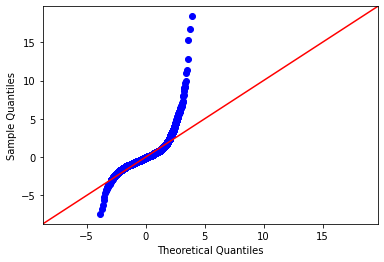

In [29]:
# Q-Q plot for the ols model
resid = model_final.resid
resid_log = model_final_log.resid
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

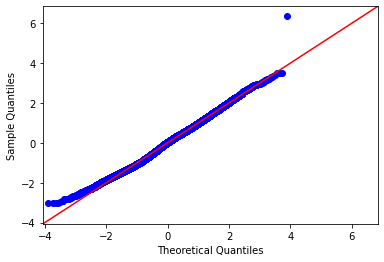

In [30]:
# Q-Q plot for the log ols model.
fig = sm.graphics.qqplot(resid_log, dist=stats.norm, line='45', fit=True)

As we can see there are a vast number of outliers, therefore we can consider the violation of the normality assumption. 

#### Investigating Multicollinearity

In [34]:
# Checking multicollinearity
vif = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
pd.Series(vif, index=X_final.columns)

sqft_living           17.452817
bathrooms             18.593786
grade_11 Excellent     1.160730
bedrooms              12.808323
view_EXCELLENT         1.052018
dtype: float64

The numbers above show significant multicollinearities for all variables besides 'grade_11 Excellent' and 'view_EXCELLENT'. 

#### Plotting regression results

Finally, we will plot residuals against all variables for both models. 

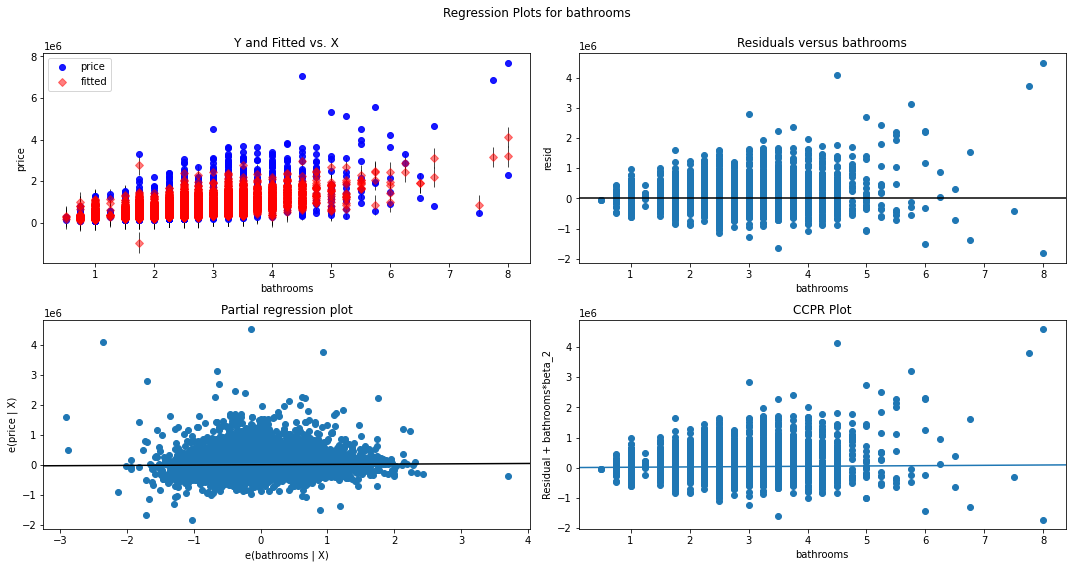

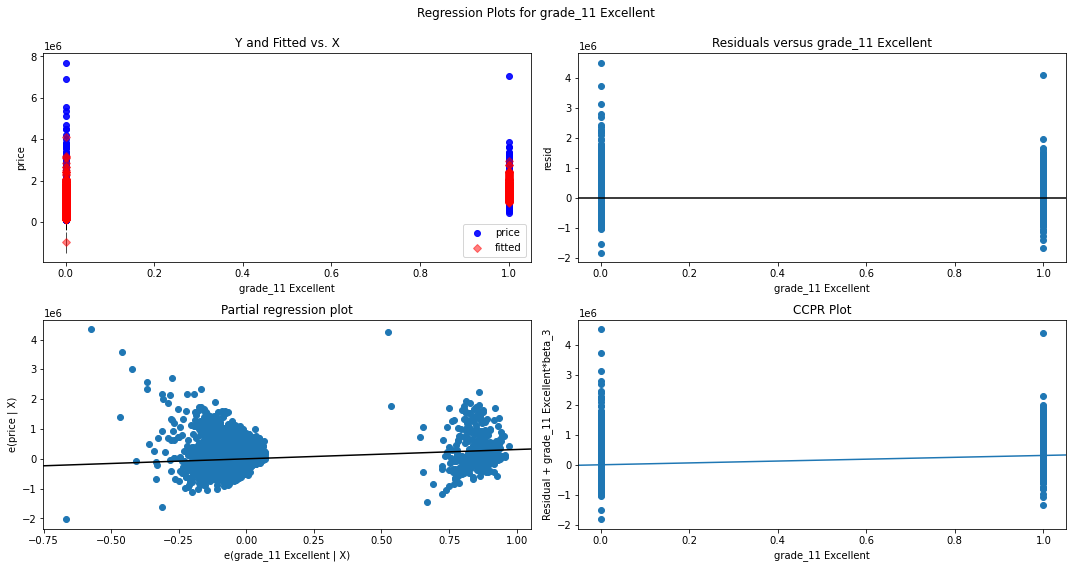

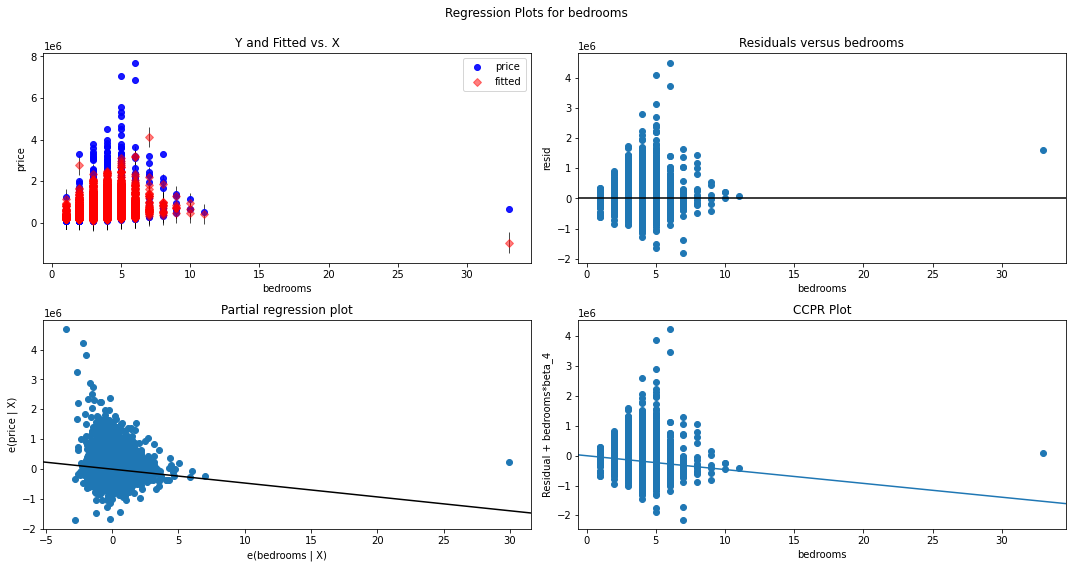

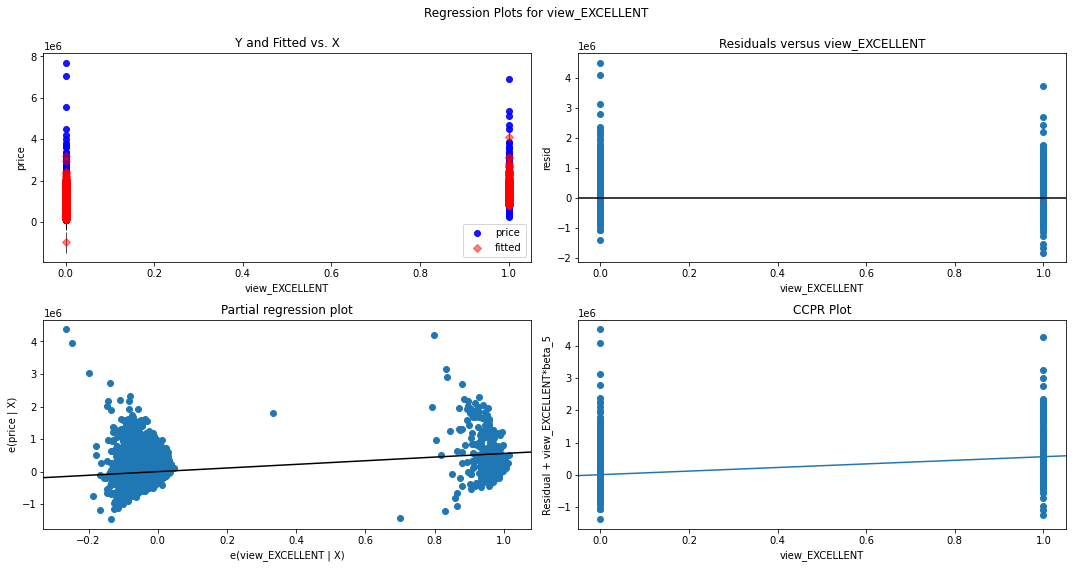

In [32]:
# Iterating over each variable for normal ols model
for param in best_fit_cat_var:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model_final, param , fig=fig)
    plt.show()

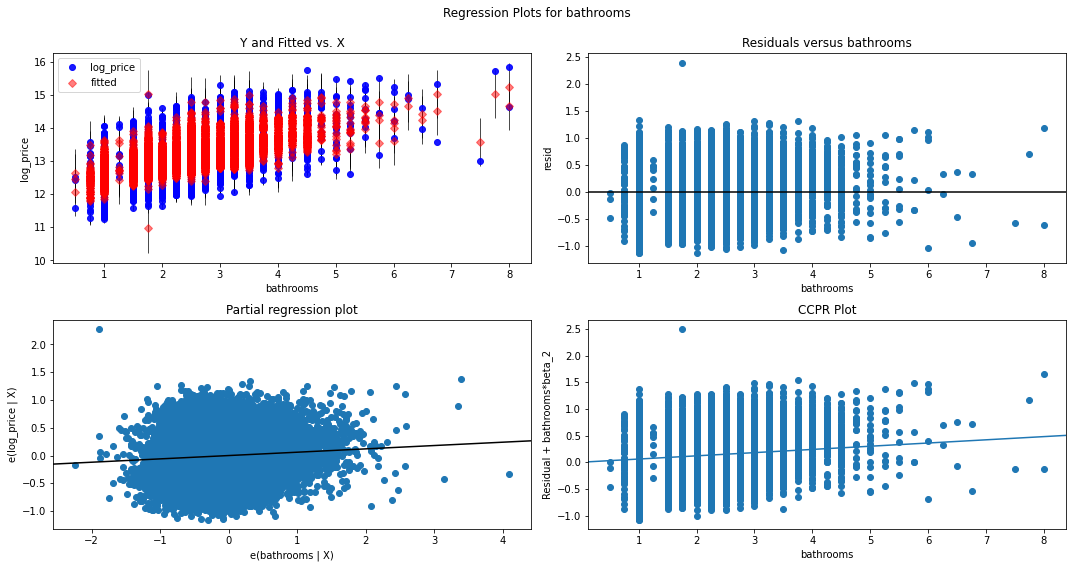

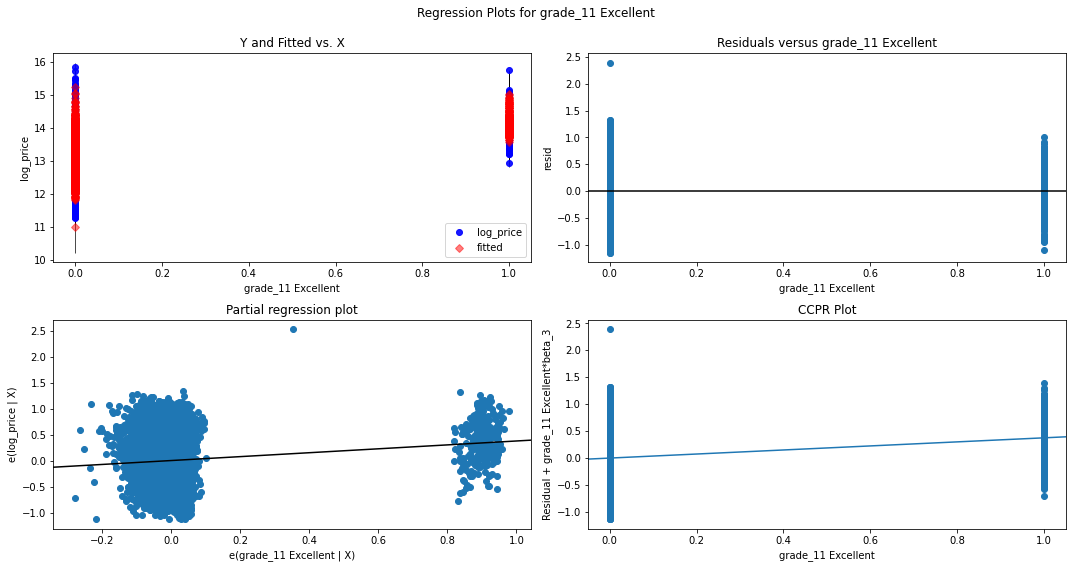

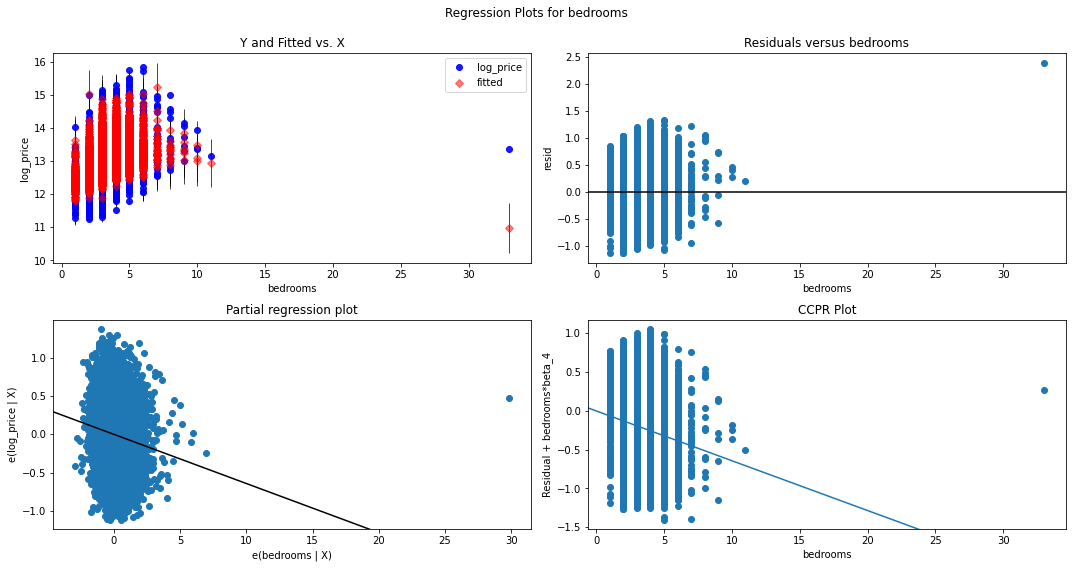

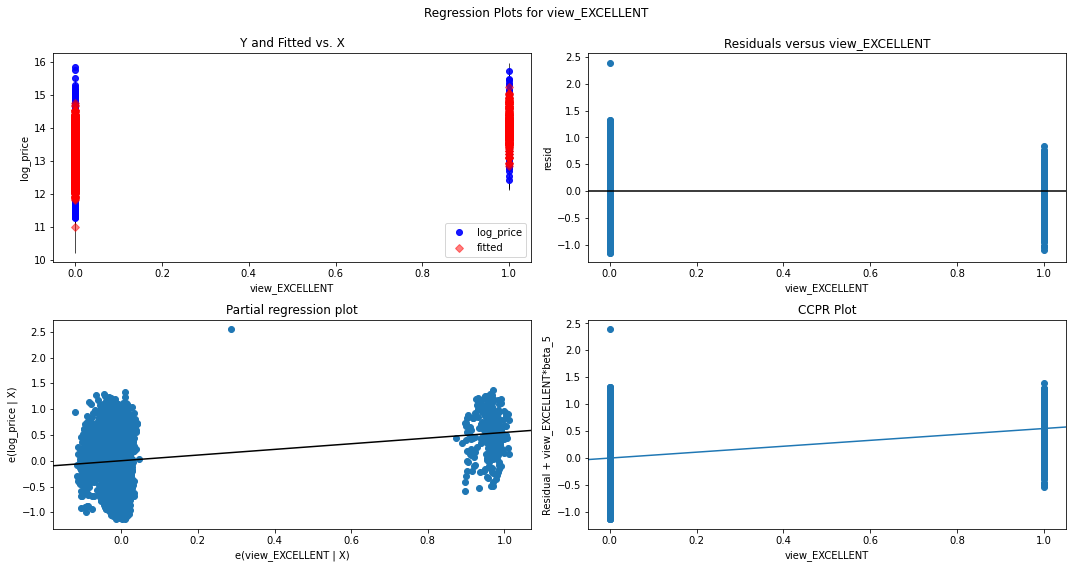

In [33]:
# Iterating over each variable for normal ols model

for param in best_fit_cat_var:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model_final_log, param , fig=fig)
    plt.show()

#### Conclusions
After validating the models we may see a relatively moderate R-Squared value, which can be result of some noise in our dataset. For both models we have strong multicollinearity for all features, besides grade_11 Excellent and view_EXCELLENT. Normality test demonstrates that residuals distribution arn't normal. 

## Summary

In this report, we were building a linear regression model based on OLS methods, using The King County real estate dataset to test which parameters have (if any) a statistically significant effect on the dependent variable 'price'. 
 
The overall regression was statistically significant (R2 = .552, p < .000).

It was found that the Square Footage of the Living Area significantly predicted price (β = 272.5097, p < .000).
It was also found that:

- Number of bathrooms significantly predicted price (β = 1.069e+04, p < .000)
- Number of bedrooms significantly predicted price (β = -4.638e+04, p < .000).



It was found that every additional square foot increases the home price by USD272.51 

It was also found that:

- Every additional bathroom increases the home price by USD10,690.00
- Every additional bedroom decreases the home price by USD46,380.00

## Business recommendations.

Based on the modeling results, we recommend our customers:

- Increasing Living Aera (by, for example, adding a second floor, our outdoor expansion);
- Adding more bathrooms;
- Decreasing the number of bedrooms.

## Further investigation:

We suggest further investigation of how features such as 'Grade' and 'View' affect home prices.

